In [277]:
import pandas as pd
import numpy as np

check_variants=True

df=pd.read_csv('train.csv')
df.sample(30)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
5644,6000_02,Mars,False,D/189/P,TRAPPIST-1e,41.0,False,1.0,0.0,808.0,0.0,0.0,Rhex Bart,False
1732,1844_03,Earth,True,G/289/S,TRAPPIST-1e,3.0,False,0.0,0.0,0.0,0.0,0.0,Winia Stannondez,True
1370,1443_01,Earth,True,G/225/P,TRAPPIST-1e,16.0,False,0.0,0.0,0.0,0.0,0.0,Anda Jimes,True
810,0863_01,Earth,True,G/129/S,TRAPPIST-1e,36.0,False,0.0,0.0,0.0,0.0,0.0,Jone Walkerez,False
966,1027_01,Mars,False,F/211/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,Cort Dal,True
3895,4172_07,Mars,False,D/141/P,TRAPPIST-1e,19.0,False,154.0,170.0,2074.0,0.0,0.0,Corsh Flell,True
8648,9227_02,Earth,True,G/1498/P,PSO J318.5-22,11.0,False,0.0,0.0,0.0,0.0,0.0,Jorgie Hinglendez,True
6423,6782_01,Earth,False,F/1300/S,PSO J318.5-22,15.0,False,NaN,0.0,533.0,72.0,0.0,Samany Ments,False
5180,5527_04,Earth,True,G/886/P,55 Cancri e,0.0,False,0.0,0.0,0.0,0.0,0.0,Almara Dickman,True
3716,3995_03,Earth,False,G/655/P,55 Cancri e,27.0,False,0.0,0.0,2.0,0.0,808.0,Colle Casonston,False


/var/folders/yl/qjs6b9wn4zx7nh630c4my9lw0000gn/T/ipykernel_53868/1190096208.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

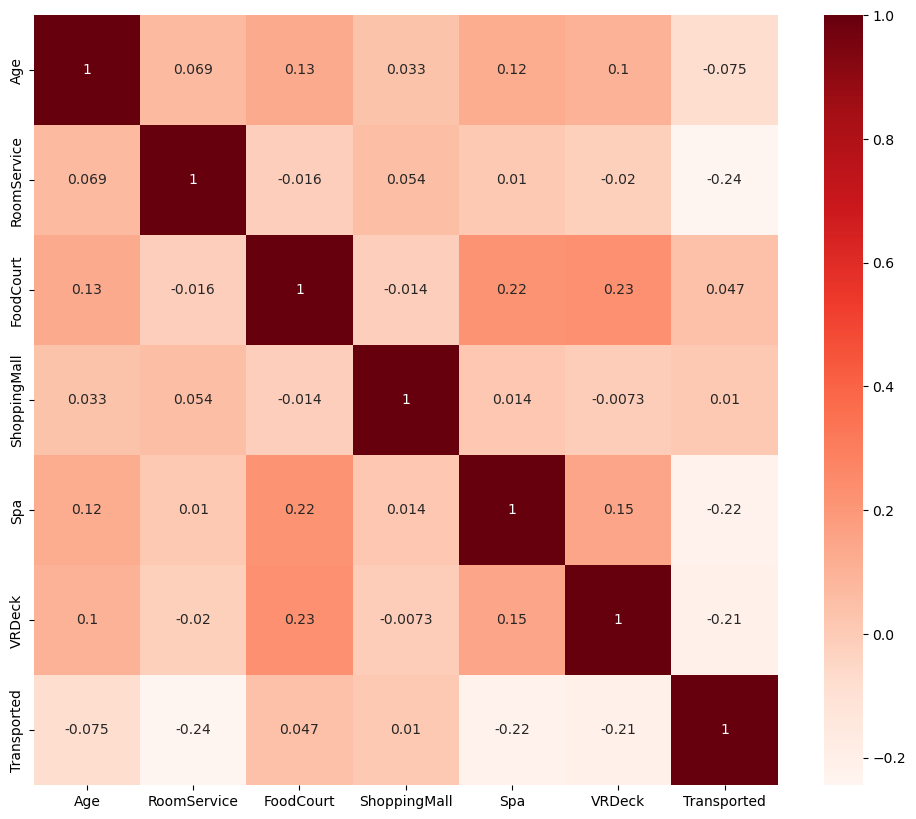

In [278]:
# plot heatmap

import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)

In [279]:
def prepare_dataset(df):
    df_new=df.copy()
    df_new["group"]=df_new["PassengerId"].str[:4]
    
    # group is too uniuqe to be a feature, takle group size into account
    df_new["group_size"]=df_new.groupby("group")["group"].transform("count")
    
    # drop group
    df_new=df_new.drop("group",axis=1)
    
    df_new["deck"]=df_new["Cabin"].str[:1]
    df_new["side"]=df_new["Cabin"].str[-1:]
    
    # drop name, cabin, passenger id
    df_new=df_new.drop(["Name","PassengerId","Cabin"],axis=1)
    
    # convert cat columns into dummy variables
    cat_cols=df_new.select_dtypes(include=["object"]).columns
    df_new=pd.get_dummies(df_new,columns=cat_cols)
    
    # create new feature XX_is_na for all columns with missing values
    for col in df_new.columns:
        if df_new[col].isna().sum()>0:
            df_new[col+"_is_na"]=df_new[col].isna()
            
    # fill missing values with median
    df_new=df_new.fillna(df_new.median())
    
    return df_new

    
df=prepare_dataset(df)
df.head()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group_size,HomePlanet_Earth,HomePlanet_Europa,...,deck_G,deck_T,side_P,side_S,Age_is_na,RoomService_is_na,FoodCourt_is_na,ShoppingMall_is_na,Spa_is_na,VRDeck_is_na
0,39.0,0.0,0.0,0.0,0.0,0.0,False,1,0,1,...,0,0,1,0,False,False,False,False,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,1,1,0,...,0,0,0,1,False,False,False,False,False,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,2,0,1,...,0,0,0,1,False,False,False,False,False,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,2,0,1,...,0,0,0,1,False,False,False,False,False,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True,1,1,0,...,0,0,0,1,False,False,False,False,False,False


In [280]:
# split
from sklearn.model_selection import train_test_split
X=df.drop("Transported",axis=1)
y=df["Transported"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [281]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
    
    
def knn(X_train,y_train,X_test,y_test):
    knn=KNeighborsClassifier()
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    print("Accuracy KNN: ",accuracy_score(y_test,y_pred))
knn(X_train,y_train,X_test,y_test)

Accuracy KNN:  0.7573317998849913


In [282]:
from sklearn.tree import DecisionTreeClassifier

def decision_tree(X_train,y_train,X_test,y_test):
    dt=DecisionTreeClassifier(max_depth=5)
    dt.fit(X_train,y_train)
    y_pred=dt.predict(X_test)
    print("Accuracy Decision Tree: ",accuracy_score(y_test,y_pred))
    
decision_tree(X_train,y_train,X_test,y_test)

Accuracy Decision Tree:  0.7625071880391029


In [283]:
# random forest

from sklearn.ensemble import RandomForestClassifier

def random_forest(X_train,y_train,X_test,y_test):
    rf=RandomForestClassifier(random_state=42)
    rf.fit(X_train,y_train)
    y_pred=rf.predict(X_test)
    print("Accuracy Random Forest: ",accuracy_score(y_test,y_pred))
    
random_forest(X_train,y_train,X_test,y_test)

Accuracy Random Forest:  0.7722829212190915


In [284]:
# Adaboost

from sklearn.ensemble import AdaBoostClassifier

def adaboost(X_train,y_train,X_test,y_test):
    ada=AdaBoostClassifier(random_state=42)
    ada.fit(X_train,y_train)
    y_pred=ada.predict(X_test)
    print("Accuracy Adaboost: ",accuracy_score(y_test,y_pred))
    
adaboost(X_train,y_train,X_test,y_test)

Accuracy Adaboost:  0.7837837837837838


In [285]:
knn(X_train,y_train,X_test,y_test)
decision_tree(X_train,y_train,X_test,y_test)
random_forest(X_train,y_train,X_test,y_test)
adaboost(X_train,y_train,X_test,y_test)

Accuracy KNN:  0.7573317998849913
Accuracy Decision Tree:  0.7625071880391029
Accuracy Random Forest:  0.7722829212190915
Accuracy Adaboost:  0.7837837837837838


In [286]:
if check_variants:

    rf_max_depth=[3, 5, 8, 14, 18]
    rf_min_samples_leaf=[10, 20, 40, 70]
    rf_max_features=[0.2, 0.5, 0.8, 1.0]

    rfs={}

    for max_depth in rf_max_depth:
        print("depth", max_depth)
        for min_samples_leaf in rf_min_samples_leaf:
            for max_features in rf_max_features:
                rf=RandomForestClassifier(random_state=42,max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_features=max_features)
                rf.fit(X_train,y_train)
                y_pred=rf.predict(X_test)
                rfs[(max_depth,min_samples_leaf,max_features)]=accuracy_score(y_test,y_pred)
    print(sorted(rfs.items(),key=lambda x:x[1],reverse=True)[:5])


depth 3
depth 5
depth 8
depth 14
depth 18


In [287]:
# (8, 10, 0.2) seems to be strong
def best_rf(X_train, y_train):
    rf=RandomForestClassifier(random_state=42,max_depth=8,min_samples_leaf=10,max_features=0.2)
    rf.fit(X_train,y_train)
    return rf
rf=best_rf(X_train,y_train)
y_pred=rf.predict(X_test)
print("Accuracy Random Forest: ",accuracy_score(y_test,y_pred))

Accuracy Random Forest:  0.7901092581943646


In [288]:
# adaboost hyperparameter tuning

if check_variants:
    ada_learning_rate=[0.1, 0.5, 1.0, 2.0]
    ada_n_estimators=[50, 100, 200, 500]

    adas={}

    for learning_rate in ada_learning_rate:
        print("learning_rate", learning_rate)
        for n_estimators in ada_n_estimators:
            ada=AdaBoostClassifier(random_state=42,learning_rate=learning_rate,n_estimators=n_estimators)
            ada.fit(X_train,y_train)
            y_pred=ada.predict(X_test)
            adas[(learning_rate,n_estimators)]=accuracy_score(y_test,y_pred)
            
    print(sorted(adas.items(),key=lambda x:x[1],reverse=True)[:5])

learning_rate 0.1
learning_rate 0.5
learning_rate 1.0
learning_rate 2.0


In [289]:
# (0.5, 500)
def best_ada(X_train, y_train):
    ada=AdaBoostClassifier(random_state=42,learning_rate=0.5,n_estimators=500)
    ada.fit(X_train,y_train)  
    return ada

ada=best_ada(X_train, y_train)
y_pred=ada.predict(X_test)
print("Accuracy Adaboost: ",accuracy_score(y_test,y_pred))


Accuracy Adaboost:  0.7849338700402531


In [290]:
# combine models

from sklearn.ensemble import VotingClassifier

rf=best_rf(X_train,y_train)
ada=best_ada(X_train,y_train)

voting=VotingClassifier(estimators=[("rf",rf),("ada",ada)],voting="soft")
voting.fit(X_train,y_train)
y_pred=voting.predict(X_test)
print("Accuracy Voting: ",accuracy_score(y_test,y_pred))


Accuracy Voting:  0.7889591719378953


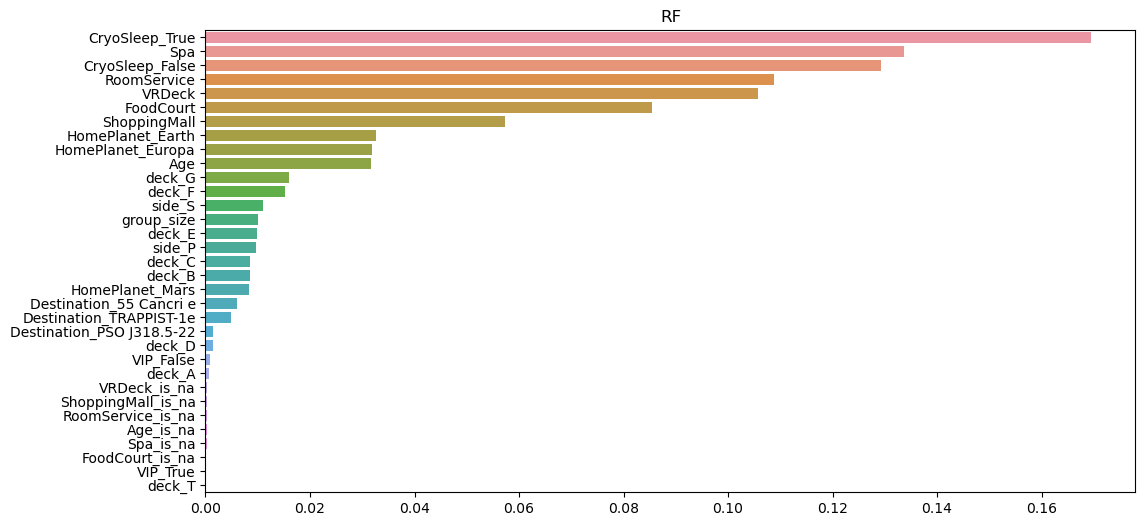

In [291]:
# feature importance

rf=RandomForestClassifier(random_state=42,max_depth=8,min_samples_leaf=10,max_features=0.2)
rf.fit(X_train,y_train)

importances=rf.feature_importances_

# plot feature importance sorted
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(importances,columns, title):
    indices=np.argsort(importances)[::-1]
    plt.figure(figsize=(12,6))
    sns.barplot(x=importances[indices],y=columns[indices])
    plt.title(title)
    plt.show()
    
plot_feature_importance(importances,X_train.columns, "RF")
    

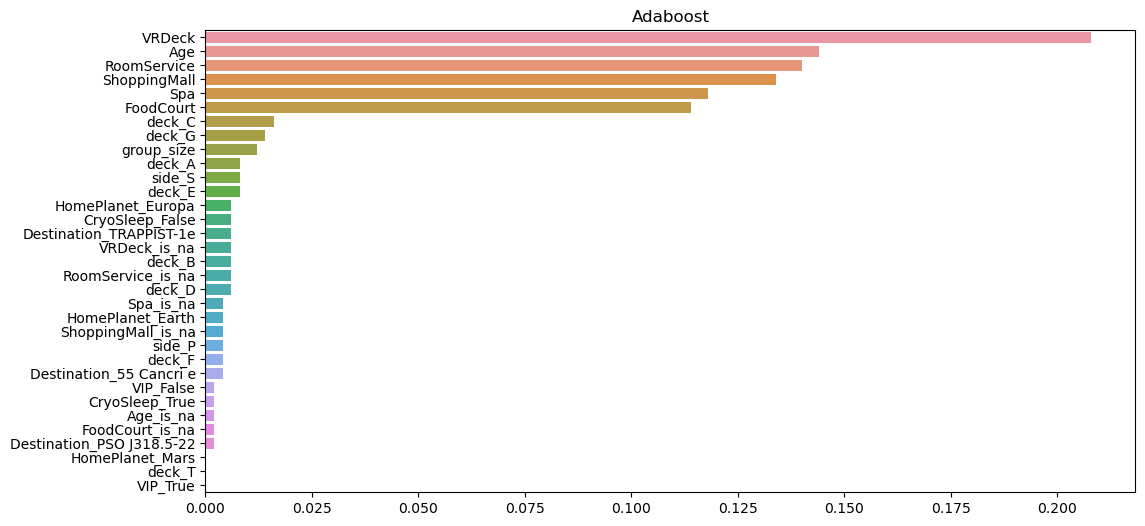

In [292]:
# plot feature importance of adaboost

ada=AdaBoostClassifier(random_state=42,learning_rate=0.5,n_estimators=500)
ada.fit(X_train,y_train)

importances=ada.feature_importances_

plot_feature_importance(importances,X_train.columns, "Adaboost")


In [293]:
df_test=pd.read_csv("test.csv")
df_test=prepare_dataset(df_test)

df_test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group_size,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,deck_G,deck_T,side_P,side_S,Age_is_na,RoomService_is_na,FoodCourt_is_na,ShoppingMall_is_na,Spa_is_na,VRDeck_is_na
0,27.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,...,1,0,0,1,False,False,False,False,False,False
1,19.0,0.0,9.0,0.0,2823.0,0.0,1,1,0,0,...,0,0,0,1,False,False,False,False,False,False
2,31.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,...,0,0,0,1,False,False,False,False,False,False
3,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,1,0,...,0,0,0,1,False,False,False,False,False,False
4,20.0,10.0,0.0,635.0,0.0,0.0,1,1,0,0,...,0,0,0,1,False,False,False,False,False,False


In [294]:
pred_test=voting.predict(df_test)


In [295]:
submission_df=pd.DataFrame({"PassengerId":pd.read_csv("test.csv")["PassengerId"],"Transported":pred_test})
submission_df.to_csv("submission.csv",index=False)

In [308]:
#rf=best_rf(X_train,y_train)
#ada=best_ada(X_train, y_train)
#ada_cols=df.columns[np.argsort(rf.feature_importances_)][:15]
#rf_cols=df.columns[np.argsort(ada.feature_importances_)][:15]

# get intersection of both
#cols_to_drop=np.intersect1d(ada_cols,rf_cols)
#print(cols_to_drop)

def remove_lowest_importance_cols(df):
    df_new=df.copy()
    # get lowest 10 feature importance from ada and rf
    
    df_new=df_new.drop(['Age_is_na', 'CryoSleep_False', 'Destination_PSO J318.5-22',
 'HomePlanet_Earth', 'Spa_is_na', 'VIP_True', 'deck_A', 'deck_B',
 'deck_D', 'deck_E', 'deck_F', 'deck_T', 'side_P'],axis=1)
    return df_new


In [309]:
def benchmark(process_func=None):
    df=pd.read_csv('train.csv')
    df=prepare_dataset(df)
    
    X=df.drop("Transported",axis=1)
    y=df["Transported"]
    
    if process_func:
        X=process_func(X)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    
    ada=best_ada(X_train, y_train)
    y_pred=ada.predict(X_test)
    ada_score=accuracy_score(y_test,y_pred)
    
    rf=best_rf(X_train,y_train)
    y_pred=rf.predict(X_test)
    rf_score=accuracy_score(y_test,y_pred)
    
    voting=VotingClassifier(estimators=[("rf",rf),("ada",ada)],voting="soft")
    voting.fit(X_train,y_train)
    y_pred=voting.predict(X_test)
    voting_score=accuracy_score(y_test,y_pred)
    
    return {"ada":ada_score,"rf":rf_score,"voting":voting_score}

In [298]:
# rf=best_rf(X_train,y_train)
# ada=best_ada(X_train, y_train)
# ada_cols=df.columns[np.argsort(rf.feature_importances_)][:6]
# rf_cols=df.columns[np.argsort(ada.feature_importances_)][:6]

# cols_to_drop=np.intersect1d(ada_cols,rf_cols)
# print(cols_to_drop)

def remove_lowest_importance_cols(df):
    df_new=df.copy()
    # get lowest 10 feature importance from ada and rf
    
    df_new=df_new.drop(['Age_is_na', 'CryoSleep_False', 'Destination_PSO J318.5-22',
 'HomePlanet_Earth', 'Spa_is_na', 'VIP_True', 'deck_A', 'deck_B',
 'deck_D', 'deck_E', 'deck_F', 'deck_T', 'side_P'],axis=1)
    return df_new

def remove_fewer_lowest_importance_cols(df):
    df_new=df.copy()
    # get lowest 10 feature importance from ada and rf
    
    df_new=df_new.drop(['RoomService_is_na', 'VIP_False', 'deck_G', 'side_S'],axis=1)
    return df_new


In [299]:
def economic_status(person):
    # Creating new column
    peopleChoices = []
    peopleChoices.append(person.VIP_False == 1)
    peopleChoices.append(person.RoomService == 0.0)
    peopleChoices.append(person.FoodCourt == 0.0)
    peopleChoices.append(person.ShoppingMall == 0.0)
    peopleChoices.append(person.Spa == 0.0)
    peopleChoices.append(person.VRDeck == 0.0)
    
    count = peopleChoices.count(True)
    if count >=5:
        return 1
    elif count >= 3 and count < 5:
        return 2
    elif count >= 1 and count < 3:
        return 3
    else:
        return 0

def add_economic_status(df):
    df_new=df.copy()
    df_new["economic_status"]=df_new.apply(economic_status,axis=1)
    return df_new

In [300]:
def sum_expanses(df):
    df_new=df.copy()
    df_new["sum_expanses"]=df_new["FoodCourt"]+df_new["ShoppingMall"]+df_new["Spa"]+df_new["VRDeck"]
    return df_new

def log_expanes(df):
    df_new=df.copy()
    df_new["log_Foodcourt"]=np.log(df_new["FoodCourt"]+1)
    df_new["log_ShoppingMall"]=np.log(df_new["ShoppingMall"]+1)
    df_new["log_Spa"]=np.log(df_new["Spa"]+1)
    df_new["log_VRDeck"]=np.log(df_new["VRDeck"]+1)
    return df_new

In [301]:
def combine_all(df):
    df_new=df.copy()
    df_new=add_economic_status(df_new)
    df_new=log_expanes(df_new)
    df_new=sum_expanses(df_new)
    df_new=remove_fewer_lowest_importance_cols(df_new)
    return df_new

In [302]:
print("baseline", benchmark())
print("remove lowest importance cols", benchmark(remove_lowest_importance_cols))
print("economic status", benchmark(add_economic_status))
print("remove fewer lowest importance cols", benchmark(remove_fewer_lowest_importance_cols))
print("log expanses", benchmark(log_expanes))
print("sum expanses", benchmark(sum_expanses))
print("combine all", benchmark(combine_all))


baseline {'ada': 0.7849338700402531, 'rf': 0.7901092581943646, 'voting': 0.7889591719378953}
remove lowest importance cols {'ada': 0.7791834387579069, 'rf': 0.7826336975273146, 'voting': 0.7826336975273146}
economic status {'ada': 0.7860839562967222, 'rf': 0.7860839562967222, 'voting': 0.7872340425531915}
remove fewer lowest importance cols {'ada': 0.7872340425531915, 'rf': 0.7855089131684876, 'voting': 0.7866589994249569}
log expanses {'ada': 0.7855089131684876, 'rf': 0.7883841288096607, 'voting': 0.7883841288096607}
sum expanses {'ada': 0.7849338700402531, 'rf': 0.7849338700402531, 'voting': 0.7855089131684876}
combine all {'ada': 0.7872340425531915, 'rf': 0.7832087406555491, 'voting': 0.7832087406555491}


In [303]:
# create new submission based on combine all

df=pd.read_csv('train.csv')
df=prepare_dataset(df)
df=combine_all(df)

X=df.drop("Transported",axis=1)
y=df["Transported"]

rf=best_rf(X,y)
ada=best_ada(X,y)
voting=VotingClassifier(estimators=[("rf",rf),("ada",ada)],voting="soft")
voting.fit(X,y)

df_test=pd.read_csv("test.csv")
df_test=prepare_dataset(df_test)
df_test=combine_all(df_test)

pred_test=voting.predict(df_test)

submission_df=pd.DataFrame({"PassengerId":pd.read_csv("test.csv")["PassengerId"],"Transported":pred_test})
submission_df.to_csv("submission2.csv",index=False)